# Live Coding 3D Face Analysis with InsightFace

In [2]:
!pip install numpy

In [3]:
!pip install insightface

In [4]:
!pip install onnxruntime


In [5]:
import datetime
import numpy as np
import os
import os.path as osp
import glob
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import matplotlib.pyplot as plt

c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 1.26.4


In [7]:
assert float('.'.join(insightface.__version__.split('.')[:2]))>=float('0.7')

In [8]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\harih/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\harih/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\harih/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\harih/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\harih/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [9]:
!pip 


Usage:   
  pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper co

In [10]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=False,download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


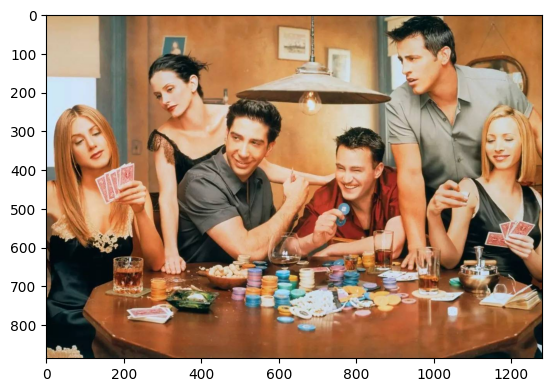

In [11]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

# Detecting the Faces
- Using buffalo_l model

In [12]:
# Detected faces
faces = app.get(img)

c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


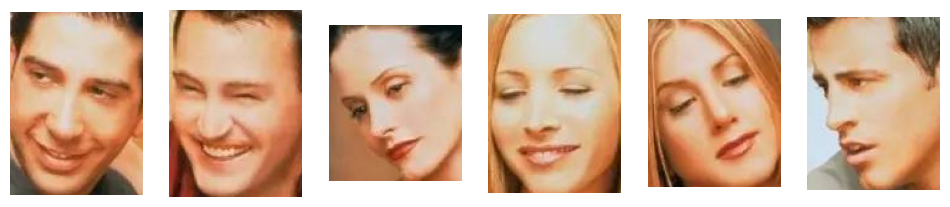

In [13]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1, 6, figsize=(12, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')    

# Face Swapping Time!

In [14]:
# Sorts left to right
faces = sorted(faces, key = lambda x : x.bbox[0])
res = img.copy()
assert len(faces)==6 # Confirm 6 faces found
source_face = faces[2]

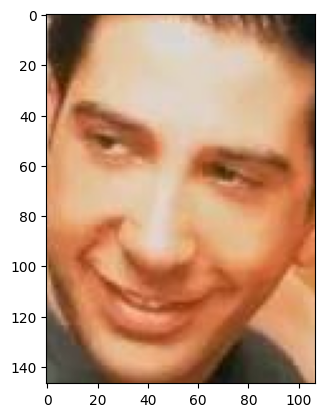

In [15]:
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [16]:
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

# After "swapper.get"

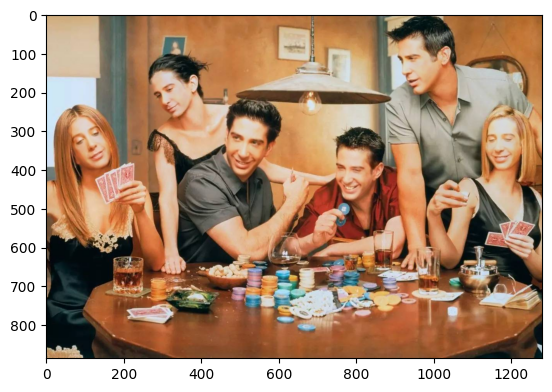

In [17]:
plt.imshow(res[:,:,::-1])
plt.show()

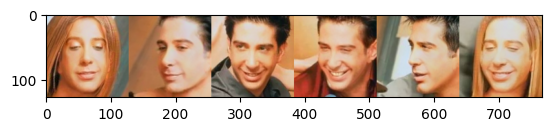

In [18]:
res = []
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)

plt.imshow(res[:,:,::-1])
plt.show()

# Put My Face on it

In [34]:
rob = cv2.imread(r"C:\Users\harih\OneDrive\Pictures\images.jpg")


[[[137 176 215]
  [137 176 215]
  [137 176 215]
  ...
  [ 93 138 195]
  [ 97 138 193]
  [101 141 194]]

 [[137 176 215]
  [137 176 215]
  [137 176 215]
  ...
  [ 92 138 192]
  [ 96 138 191]
  [ 99 137 191]]

 [[138 177 216]
  [138 177 216]
  [138 177 216]
  ...
  [ 92 136 190]
  [ 93 135 188]
  [ 95 133 187]]

 ...

 [[127 134 231]
  [125 134 232]
  [123 132 235]
  ...
  [178 182 207]
  [180 184 209]
  [176 179 207]]

 [[125 134 231]
  [123 134 232]
  [121 132 236]
  ...
  [178 182 207]
  [180 184 209]
  [176 179 207]]

 [[123 135 229]
  [121 134 232]
  [119 132 238]
  ...
  [179 183 208]
  [180 184 209]
  [176 179 207]]]


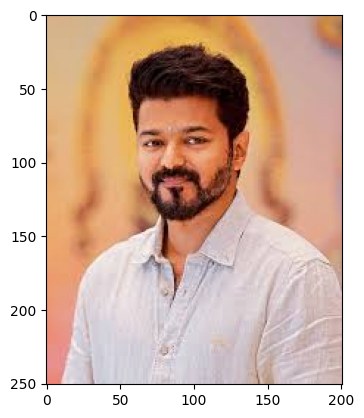

In [36]:
import matplotlib.pyplot as plt
print(rob)

if rob is not None:
    plt.imshow(rob[:,:,::-1])
    plt.show()
else:
    print("Error: 'rob' is None")


## 1. Detect and Save my Face

c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


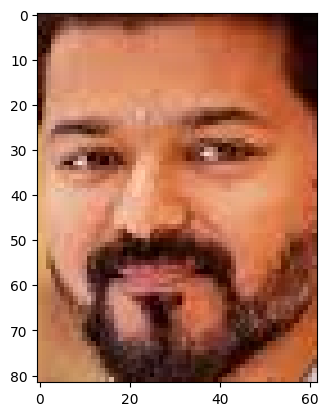

In [37]:
rob_faces = app.get(rob)
assert len(rob_faces) == 1
rob_face = rob_faces[0]
bbox = rob_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(rob[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

## 2. Detect Friend's faces

In [38]:
faces = app.get(img)

## 3. Swap my face for theirs on the image

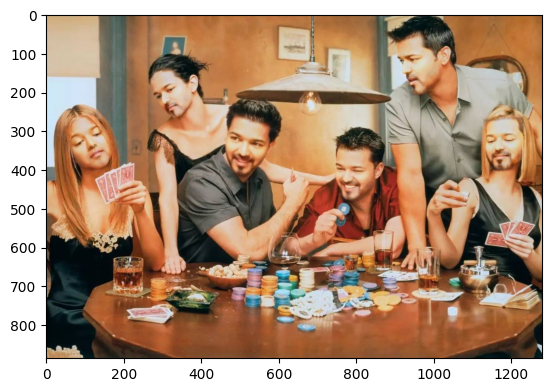

In [39]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, rob_face, paste_back=True)
plt.imshow(res[:,:,::-1])
plt.show() 

## Close up view!

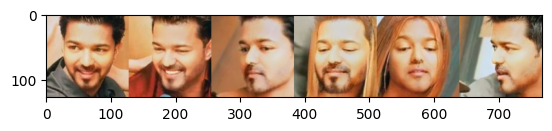

In [40]:
res = []
for face in faces:
    _img, _ = swapper.get(img,
                          face,
                          rob_face,
                          paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)

plt.imshow(res[:,:,::-1])
plt.show()

## Swap with Monty Python

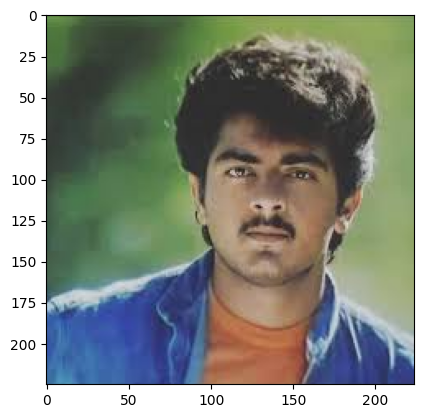

In [45]:
monty = cv2.imread(r"C:\Users\harih\OneDrive\Pictures\ajith.jpg")
plt.imshow(monty[:,:,::-1])
plt.show()

In [46]:
faces = app.get(monty)

c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


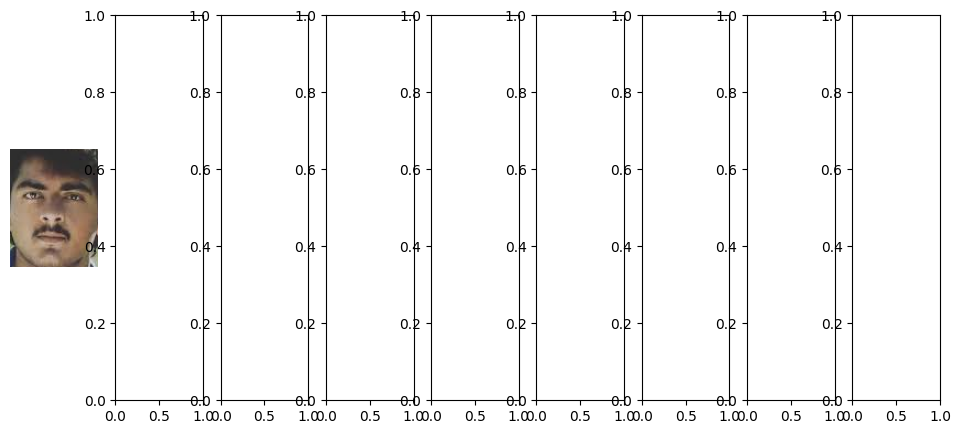

In [47]:
fig, axs = plt.subplots(1, 9, figsize=(12, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(monty[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')    

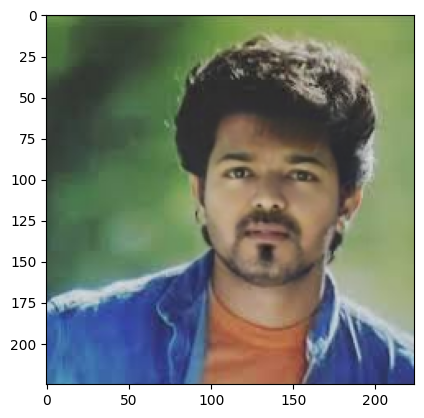

In [48]:
faces = app.get(monty)
res = monty.copy()
for face in faces:
    res = swapper.get(res, face, rob_face, paste_back=True)
plt.imshow(res[:,:,::-1])
plt.show() 

# Swap two faces

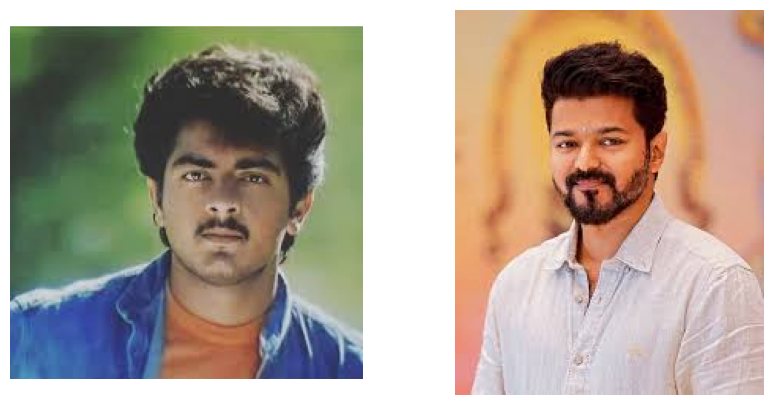

In [49]:
img1 = cv2.imread(r"C:\Users\harih\OneDrive\Pictures\ajith.jpg")
img2 = cv2.imread(r"C:\Users\harih\OneDrive\Pictures\images.jpg")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1[:,:,::-1])
axs[0].axis('off')
axs[1].imshow(img2[:,:,::-1])
axs[1].axis('off')
plt.show()

In [50]:
face1 = app.get(img1)[0]
face2 = app.get(img2)[0]

c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


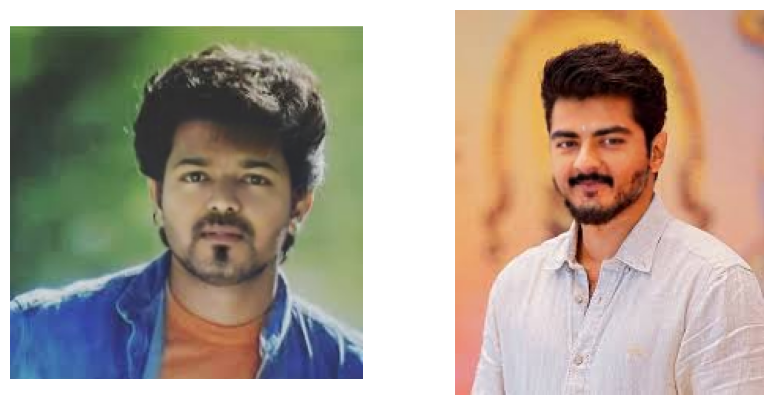

In [51]:
img1_ = img1.copy()
img2_ = img2.copy()
img1_ = swapper.get(img1_, face1, face2, paste_back=True)
img2_ = swapper.get(img2_, face2, face1, paste_back=True)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1_[:,:,::-1])
axs[0].axis('off')
axs[1].imshow(img2_[:,:,::-1])
axs[1].axis('off')
plt.show()

In [53]:
def swap_n_show(img1_fn, img2_fn, app, swapper,
                plot_before=True, plot_after=True):
    """
    Uses face swapper to swap faces in two different images.
    
    plot_before: if True shows the images before the swap
    plot_after: if True shows the images after the swap
    
    returns images with swapped faces.
    
    Assumes one face per image.
    """
    img1 = cv2.imread(img1_fn)
    img2 = cv2.imread(img2_fn)
    
    if plot_before:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2[:,:,::-1])
        axs[1].axis('off')
        plt.show()
    
    # Do the swap
    face1 = app.get(img1)[0]
    face2 = app.get(img2)[0]
    
    img1_ = img1.copy()
    img2_ = img2.copy()
    if plot_after:
        img1_ = swapper.get(img1_, face1, face2, paste_back=True)
        img2_ = swapper.get(img2_, face2, face1, paste_back=True)
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1_[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2_[:,:,::-1])
        axs[1].axis('off')
        plt.show()
    return img1_, img2_

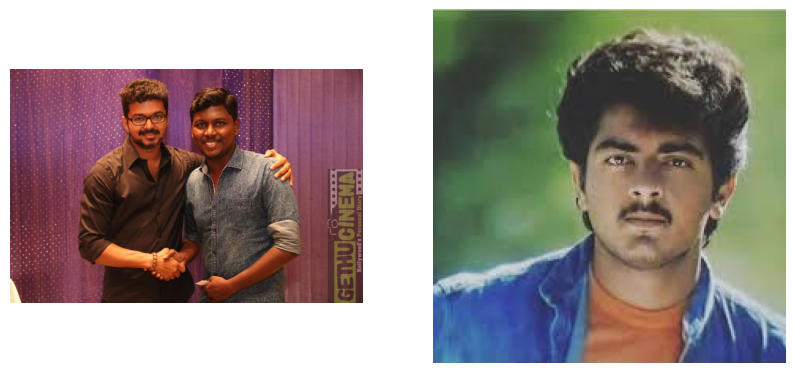

c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


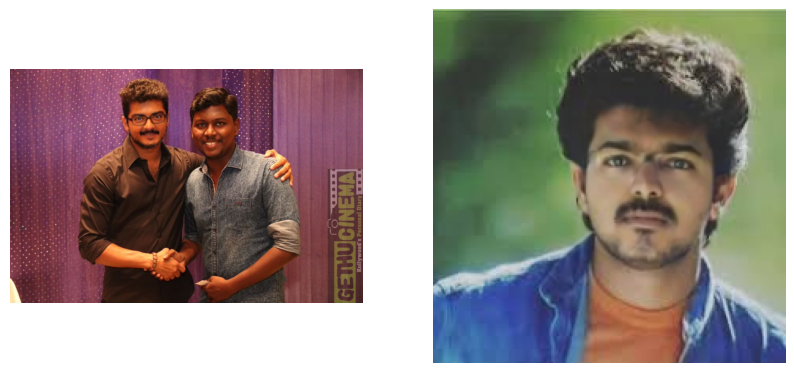

In [55]:
_ = swap_n_show(r"C:\Users\harih\OneDrive\Pictures\Vijay-10.jpg", r"C:\Users\harih\OneDrive\Pictures\ajith.jpg", app, swapper)

# Swap Faces try again

In [1]:
def swap_n_show_same_img(img1_fn,
                         app, swapper,
                         plot_before=True,
                         plot_after=True):
    """
    Uses face swapper to swap faces in the same image.
    
    plot_before: if True shows the images before the swap
    plot_after: if True shows the images after the swap
    
    returns images with swapped faces.
    
    Assumes one face per image.
    """
    img1 = cv2.imread(img1_fn)
    
    if plot_before:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        ax.imshow(img1[:,:,::-1])
        ax.axis('off')
        plt.show()
    
    # Do the swap
    faces = app.get(img1)
    face1, face2 = faces[0], faces[1]
    
    img1_ = img1.copy()
    if plot_after:
        img1_ = swapper.get(img1_, face1, face2, paste_back=True)
        img1_ = swapper.get(img1_, face2, face1, paste_back=True)
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        ax.imshow(img1_[:,:,::-1])
        ax.axis('off')
        plt.show()
    return img1_